In [1]:
import os

import pandas as pd
from pandas_profiling import ProfileReport

## RAW

In [3]:
datasources = {source.replace(".zip",""):source for source in os.listdir("../data/in") if source.endswith(".zip")}
datasources

{'demographics': 'demographics.zip',
 'epidemiology': 'epidemiology.zip',
 'health': 'health.zip',
 'hospitalizations': 'hospitalizations.zip',
 'index': 'index.zip',
 'vaccinations': 'vaccinations.zip'}

### Load data sources

In this part we just load all data with Pandas for further processing. In this case we just have a bunch of CSV data, but data loading (or extraction, the E of "ETL") can be much more complicated when we have to connect to the clients' database or when the files we have to process are Excel files with macros 😱

In [4]:
datasets = {}
for key,value in datasources.items():
    datasets[key] = pd.read_csv(f"../data/in/{value}")

### Execute a data profiling for each source

To have a very brief and direct summary to understand data, we can execute a profiling on al data sources individually. This operation will give us a brief overview about the state of data and will help us to establish next steps in the following data processing phases (how to filter, how to impute missing values, if column names afre correct, etc.)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

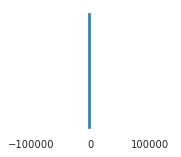

In [5]:
os.makedirs("../profiling", exist_ok=True)
for key,value in datasets.items():
    profile = ProfileReport(value, minimal=True)
    profile.to_file(f"../profiling/{key}.html")

### Save data into `raw` schema

In [6]:
os.makedirs("../data/raw", exist_ok=True)

In [7]:
for key,value in datasets.items():
    value.to_csv(f"../data/raw/{key}.zip", index=False)